In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate, spatial

https://stackoverflow.com/questions/78567599/scipy-bad-interpolation-of-3d-point-cloud?noredirect=1#comment138515679_78567599

In [2]:
grid = pd.read_csv("grid_XY.txt", sep=",", header=None)
lidar = pd.read_csv("lidar.txt", sep=",", header=None)

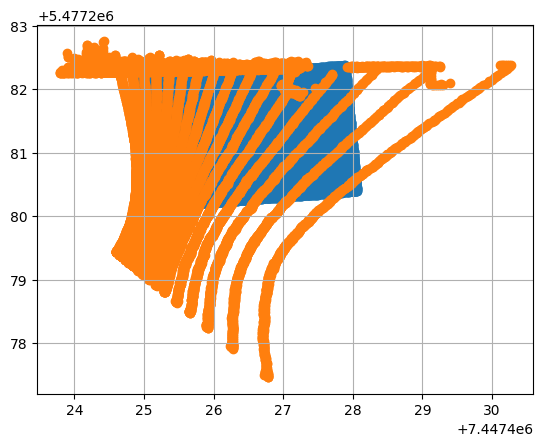

In [3]:
fig, axe = plt.subplots()
axe.scatter(*grid.values.T)
axe.scatter(*lidar.iloc[:,:2].values.T)
axe.grid()

In [4]:
xyz_interpolator = interpolate.LinearNDInterpolator(lidar.values[:,:2], lidar.values[:,2])

In [5]:
z = xyz_interpolator(grid.values)

In [6]:
xyz = np.vstack([grid.values.T, z]).T

In [7]:
lidar_interpolator = interpolate.LinearNDInterpolator(lidar.values[:,:3], lidar.values[:,3])

In [8]:
w = lidar_interpolator(xyz)

In [9]:
lidar_triangulation = spatial.Delaunay(lidar.values[:,:3])
xyz_triangulation = spatial.Delaunay(xyz)

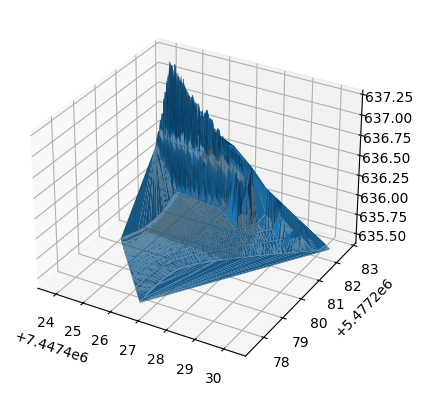

In [10]:
fig, axe = plt.subplots(subplot_kw={"projection": "3d"})
axe.plot_trisurf(*lidar.values[:,:3].T, triangles=lidar_triangulation.simplices)
axe.plot_trisurf(*xyz.T, triangles=xyz_triangulation.simplices, alpha=0.5)

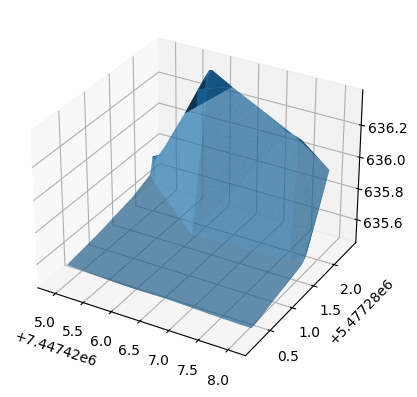

In [11]:
fig, axe = plt.subplots(subplot_kw={"projection": "3d"})
axe.plot_trisurf(*xyz.T, triangles=xyz_triangulation.simplices)

In [ ]:
interpolate.RBFInterpolator(lidar.values[:,:2], lidar.values[:,2:])